In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## On charge notre dataframe nettoyé:
df= pd.read_csv('consoBat_df9.csv')

In [3]:
df.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
0,1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,...,189.000000,7456910.0,2003882.00,3946027.0,1276453.0,False,Compliant,249.98,2.83,89
1,2,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,...,179.399994,8664479.0,0.00,3242851.0,5145082.0,False,Compliant,295.86,2.86,20
2,5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,...,224.000000,6946800.5,2214446.25,2768924.0,1811213.0,False,Compliant,286.43,4.67,90
3,10,NonResidential,Hotel,Camlin,1619 9th Avenue,Seattle,WA,98101.0,0660000825,7,...,154.699997,6062767.5,0.00,2811215.0,2947580.0,False,Compliant,176.14,2.12,90
4,11,NonResidential,Other,Paramount Theatre,911 Pine St,Seattle,WA,98101.0,0660000955,7,...,152.300003,7067881.5,2276286.50,3636655.0,385189.0,False,Compliant,221.51,2.16,90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  1367 non-null   int64  
 1   BuildingType                   1367 non-null   object 
 2   PrimaryPropertyType            1367 non-null   object 
 3   PropertyName                   1367 non-null   object 
 4   Address                        1367 non-null   object 
 5   City                           1367 non-null   object 
 6   State                          1367 non-null   object 
 7   ZipCode                        1367 non-null   float64
 8   TaxParcelIdentificationNumber  1367 non-null   object 
 9   CouncilDistrictCode            1367 non-null   int64  
 10  Neighborhood                   1367 non-null   object 
 11  Latitude                       1367 non-null   float64
 12  Longitude                      1367 non-null   f

In [5]:
# On sépare les variables numériques des variables catégorielles:
var_num= df.select_dtypes(include=['int64','float64'])
var_categ= df.select_dtypes(exclude=['int64','float64','bool']) 

In [6]:
var_categ.head()

,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,ComplianceStatus
0,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,0659000030,DOWNTOWN,Hotel,Hotel,Compliant
1,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,0659000220,DOWNTOWN,"Hotel, Parking, Restaurant",Hotel,Compliant
2,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,0659000640,DOWNTOWN,Hotel,Hotel,Compliant
3,NonResidential,Hotel,Camlin,1619 9th Avenue,Seattle,WA,0660000825,DOWNTOWN,Hotel,Hotel,Compliant
4,NonResidential,Other,Paramount Theatre,911 Pine St,Seattle,WA,0660000955,DOWNTOWN,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,Compliant


In [7]:
var_categ.nunique()

BuildingType                        5
PrimaryPropertyType                21
PropertyName                     1365
Address                          1353
City                                1
State                               1
TaxParcelIdentificationNumber    1315
Neighborhood                       18
ListOfAllPropertyUseTypes         284
LargestPropertyUseType             50
ComplianceStatus                    4
dtype: int64

On écarte les variables catégorielles qui représentent des constantes:

In [8]:
var_categ= var_categ.drop(['BuildingType','City','State'],axis=1)

In [9]:
var_categ.head()

,PrimaryPropertyType,PropertyName,Address,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,ComplianceStatus
0,Hotel,Mayflower park hotel,405 Olive way,0659000030,DOWNTOWN,Hotel,Hotel,Compliant
1,Hotel,Paramount Hotel,724 Pine street,0659000220,DOWNTOWN,"Hotel, Parking, Restaurant",Hotel,Compliant
2,Hotel,HOTEL MAX,620 STEWART ST,0659000640,DOWNTOWN,Hotel,Hotel,Compliant
3,Hotel,Camlin,1619 9th Avenue,0660000825,DOWNTOWN,Hotel,Hotel,Compliant
4,Other,Paramount Theatre,911 Pine St,0660000955,DOWNTOWN,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,Compliant


In [10]:
#Sélection des variables catégorielles pertinentes pour notre modèle:
var_categ= var_categ.drop(['PropertyName','Address','TaxParcelIdentificationNumber','ListOfAllPropertyUseTypes'],axis=1)

In [11]:
var_categ.columns.tolist()

['PrimaryPropertyType',
 'Neighborhood',
 'LargestPropertyUseType',
 'ComplianceStatus']

On s'intéresse maintenant aux variables numériques:

In [12]:
var_num.columns

Index(['OSEBuildingID', 'ZipCode', 'CouncilDistrictCode', 'Latitude',
       'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)',
       'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'BuildingAge'],
      dtype='object')

Identification des variables fortement corrélées avec les 2 variables de prédictions (On définit un seuil de 0.7):

Dans cette partie de modélisation, on séléctionne la variables target: (SiteEnergyUseWN(kBtu) au lieu de (SiteEUIWN(kBtu/sf)) qui prend pas en compte la surface du site.  

In [13]:
var_num= var_num.drop(['SiteEUIWN(kBtu/sf)'],axis=1)

On écarte les variables non pertinentes pour notre modèle:

In [14]:
var_num= var_num.drop(['OSEBuildingID','ZipCode','CouncilDistrictCode','Latitude','Longitude'],axis=1)

On écarte les variables (SteamUse(kBtu)), (Electricity(kBtu)),(NaturalGas(kBtu)) qui représentent des relevés et ne doivent pas être pris en compte par souci de data leakage.

In [15]:
var_num= var_num.drop(['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)'],axis=1)

In [16]:
var_num.columns.tolist()

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUseWN(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'BuildingAge']

In [17]:
df_filter= pd.concat([var_categ, var_num], axis=1)

In [18]:
df_filter.head()

,PrimaryPropertyType,Neighborhood,LargestPropertyUseType,ComplianceStatus,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
0,Hotel,DOWNTOWN,Hotel,Compliant,1.0,12,88434,0,88434,88434.0,60.0,189.000000,7456910.0,249.98,2.83,89
1,Hotel,DOWNTOWN,Hotel,Compliant,1.0,11,103566,15064,88502,83880.0,61.0,179.399994,8664479.0,295.86,2.86,20
2,Hotel,DOWNTOWN,Hotel,Compliant,1.0,10,61320,0,61320,61320.0,56.0,224.000000,6946800.5,286.43,4.67,90
3,Hotel,DOWNTOWN,Hotel,Compliant,1.0,11,83008,0,83008,81352.0,27.0,154.699997,6062767.5,176.14,2.12,90
4,Other,DOWNTOWN,Other - Entertainment/Public Assembly,Compliant,1.0,8,102761,0,102761,102761.0,NaN,152.300003,7067881.5,221.51,2.16,90


In [19]:
df_filter.shape

(1367, 16)

In [20]:
df_filter.PrimaryPropertyType.unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'Small- and Mid-Sized Office', 'Self-Storage Facility',
       'Warehouse', 'Large Office', 'Retail Store', 'University',
       'Residence Hall', 'Distribution Center', 'Senior Care Community',
       'Worship Facility', 'Medical Office',
       'Supermarket / Grocery Store', 'Refrigerated Warehouse',
       'Low-Rise Multifamily', 'Restaurant', 'Laboratory', 'Hospital'],
      dtype=object)

On prépare le feature (PrimaryPropertyType) pour l'encodage OneHotEncoder:

In [21]:
def PropertyType_preprocessing(text):
    """
    Function to Preprocess the features PrimaryPropertyType .
    """
    text = text.replace("/", "")    # Remove slash
    text = text.replace("-", "")    # Remove dash
    text = text.replace(" ", "")    # Remove whitespaces
    text = text.replace("12", "Twelve")
    return text

df_filter['PrimaryPropertyType'] = df_filter['PrimaryPropertyType'].apply(lambda x: PropertyType_preprocessing(x))

In [22]:
df_filter.PrimaryPropertyType.unique()

array(['Hotel', 'Other', 'MixedUseProperty', 'KTwelveSchool',
       'SmallandMidSizedOffice', 'SelfStorageFacility', 'Warehouse',
       'LargeOffice', 'RetailStore', 'University', 'ResidenceHall',
       'DistributionCenter', 'SeniorCareCommunity', 'WorshipFacility',
       'MedicalOffice', 'SupermarketGroceryStore',
       'RefrigeratedWarehouse', 'LowRiseMultifamily', 'Restaurant',
       'Laboratory', 'Hospital'], dtype=object)

In [23]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PrimaryPropertyType        1367 non-null   object 
 1   Neighborhood               1367 non-null   object 
 2   LargestPropertyUseType     1367 non-null   object 
 3   ComplianceStatus           1367 non-null   object 
 4   NumberofBuildings          1367 non-null   float64
 5   NumberofFloors             1367 non-null   int64  
 6   PropertyGFATotal           1367 non-null   int64  
 7   PropertyGFAParking         1367 non-null   int64  
 8   PropertyGFABuilding(s)     1367 non-null   int64  
 9   LargestPropertyUseTypeGFA  1367 non-null   float64
 10  ENERGYSTARScore            934 non-null    float64
 11  SourceEUIWN(kBtu/sf)       1367 non-null   float64
 12  SiteEnergyUseWN(kBtu)      1367 non-null   float64
 13  TotalGHGEmissions          1367 non-null   float

In [24]:
# on charge le df_filter dans un fichier csv:
df_filter.to_csv('consoBat_df_filter.csv',index=False)

### Prédiction de la variable de consommation d'énergie: (SiteEnergyUseWN(kBtu))

#### Préparation du preprocessor:

In [25]:
# Importation des bibliothèques nécessaires:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

##### On définit les variables X et y:

In [26]:
# On écarte les 2 variables de prédictions
X=df_filter.drop(['TotalGHGEmissions','SiteEnergyUseWN(kBtu)'],axis=1)

In [27]:
# On écarte la variable (ENERGYSTARScore) avec taux de remplissage 66%.
X=df_filter.drop(['ENERGYSTARScore'],axis=1)

In [28]:
y= df_filter['SiteEnergyUseWN(kBtu)']

##### On split les données entre Training set et Test set:

In [29]:
#spliting data to training/test data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42,shuffle= True)

In [30]:
# dimensions X_train et X_test
print(X_train.shape)
print(X_test.shape)

(820, 15)
(547, 15)


On a un dataframe avec des variables catégorielles et numériques, donc on fait appel à (make_column_transformer)

In [31]:
col_categ= var_categ.columns.tolist()

In [32]:
col_num= var_num.columns.tolist()

In [33]:
col_num

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUseWN(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'BuildingAge']

In [34]:
#On écarte les 2 variables de prédictions et la variable (ENERGYSTARScore) avec données manquantes.
remove_lst= ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions','ENERGYSTARScore']
for x in remove_lst:
    print (x), col_num.remove(x)       

SiteEnergyUseWN(kBtu)
TotalGHGEmissions
ENERGYSTARScore


In [35]:
# Vérification:
col_num

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SourceEUIWN(kBtu/sf)',
 'GHGEmissionsIntensity',
 'BuildingAge']

In [36]:
# Application de make_column_transformer car différent type de preprocessing requis pour les features.
column_trans= make_column_transformer((OneHotEncoder(handle_unknown='ignore'),col_categ), (StandardScaler(), col_num))

In [37]:
column_trans.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['PrimaryPropertyType', 'Neighborhood',
                                  'LargestPropertyUseType',
                                  'ComplianceStatus']),
                                ('standardscaler',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 ['NumberofBuildings', 'NumberofFloors',
                                  'PropertyGFATotal', 'PropertyGFAParking',
                   

#### Application du modèle basique de regression: LinearRegression

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [39]:
# On crée le modèle à l'aide de pipeline
pipe_lr= make_pipeline(column_trans,lr)

In [40]:
# liste des paramètres de l'estimateur:
pipe_lr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'linearregression', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__onehotencoder', 'columntransformer__standardscaler', 'columntransformer__onehotencoder__categories', 'columntransformer__onehotencoder__drop', 'columntransformer__onehotencoder__dtype', 'columntransformer__onehotencoder__handle_unknown', 'columntransformer__onehotencoder__sparse', 'columntransformer__standardscaler__copy', 'columntransformer__standardscaler__with_mean', 'columntransformer__standardscaler__with_std', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

cross validation avec GridSearchCV() 

In [41]:
#Grille de recherche:
parameter= {'linearregression__fit_intercept':[True,False]}
grid_lr= GridSearchCV(pipe_lr, parameter, cv=5,scoring='r2')

In [42]:
grid_lr.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='ignore',
                       

In [43]:
print(grid_lr.best_score_)
print(grid_lr.best_params_)

0.8557903490652488
{'linearregression__fit_intercept': True}


In [44]:
model_lr= grid_lr.best_estimator_
pred_lr= model_lr.predict(X_test)
r2_score(y_test, pred_lr)

0.6770801541135869

##### Implémentation d'une fonction pour calcul des métriques:

In [45]:
def compute_scores(y_test, prediction):
    """Function which computes RMSE, MSE, MAE, Median AE and R^2 of a prediction compared to true values."""
      
    rmse = mean_squared_error(y_test, prediction, squared=False)
    mse = mean_squared_error(y_test, prediction, squared=True)
    mae = mean_absolute_error(y_test, prediction)
    median_ae = median_absolute_error(y_test, prediction)
    r2 = r2_score(y_test, prediction)
    
    scores = [rmse, mse, mae, median_ae, r2]

    print("RMSE : {:,.0f}".format(rmse).replace(',', ' '))
    print("MSE : {:,.0f}".format(mse).replace(',', ' '))
    print("MAE : {:,.0f}".format(mae).replace(',', ' '))
    print("Median AE : {:,.0f}".format(median_ae).replace(',', ' '))
    print("R² : {:.3f}".format(r2).replace(',', ' '))
    
    return scores

In [46]:
# calcul des métriques:
compute_scores(y_test, pred_lr)

RMSE : 3 036 759
MSE : 9 221 908 205 074
MAE : 1 123 234
Median AE : 566 862
R² : 0.677


[3036759.4908181466,
 9221908205074.09,
 1123233.5152424301,
 566861.9946883405,
 0.6770801541135869]

##### Plot de comparaison entre y_test, pred_lr:

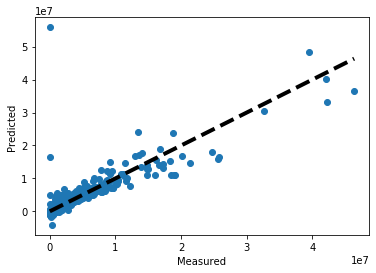

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, pred_lr)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Application du modèle: Ridge Regression

In [48]:
# Importation du modèle et instaciation de l'objet:
from sklearn.linear_model import Ridge
ridge= Ridge()

In [49]:
# On crée le modèle à l'aide de pipeline
pipe_ridge= make_pipeline(column_trans,ridge)

##### Cross validation avec: cross_val_score()

In [50]:
cross_val_score(pipe_ridge,X_train,y_train,cv=5,scoring='r2')

array([0.87985528, 0.84852621, 0.87434296, 0.86979602, 0.85878543])

##### Optimisation des hyperparamètres avec: GridSearchCV()

In [51]:
# Définition des paramètres:
#le paramètre alpha permet de corriger l'overfitting
parameter= {'ridge__alpha': [5,10,15]}
#Grille de recherche:
grid_ridge= GridSearchCV(pipe_ridge ,parameter, cv=5,scoring='r2')

In [52]:
grid_ridge.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='ignore',
                       

In [53]:
print(grid_ridge.best_score_)
print(grid_ridge.best_params_)

0.8723458049988325
{'ridge__alpha': 15}


In [54]:
model_ridge= grid_ridge.best_estimator_
pred_ridge= model_ridge.predict(X_test)
r2_score(y_test, pred_ridge)

0.6912534268880715

In [55]:
# calcul des métriques:
compute_scores(y_test, pred_ridge)

RMSE : 2 969 369
MSE : 8 817 149 494 339
MAE : 1 064 976
Median AE : 503 952
R² : 0.691


[2969368.5346111814,
 8817149494338.955,
 1064976.1748318241,
 503952.061782795,
 0.6912534268880715]

##### Plot de comparaison entre y_test, pred_ridge:

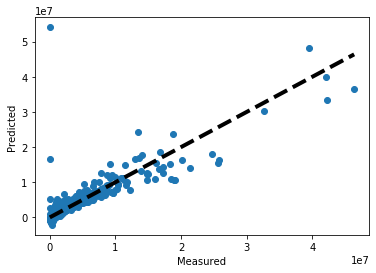

In [56]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_ridge)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Application du modèle: Support Vector Regression

In [57]:
from sklearn.svm import SVR
svr= SVR()

In [58]:
# On crée le modèle à l'aide de pipeline
from sklearn.pipeline import make_pipeline
pipe_svr= make_pipeline(column_trans,svr)

In [59]:
# liste des paramètres de l'estimateur:
pipe_svr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'svr', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__onehotencoder', 'columntransformer__standardscaler', 'columntransformer__onehotencoder__categories', 'columntransformer__onehotencoder__drop', 'columntransformer__onehotencoder__dtype', 'columntransformer__onehotencoder__handle_unknown', 'columntransformer__onehotencoder__sparse', 'columntransformer__standardscaler__copy', 'columntransformer__standardscaler__with_mean', 'columntransformer__standardscaler__with_std', 'svr__C', 'svr__cache_size', 'svr__coef0', 'svr__degree', 'svr__epsilon', 'svr__gamma', 'svr__kernel', 'svr__max_iter', 'svr__shrinking', 'svr__tol', 'svr__verbose'])

In [60]:
# Cross validation avec: cross_val_score()
cross_val_score(pipe_svr,X_train,y_train,cv=5)

array([-0.11849693, -0.11601447, -0.09484573, -0.17837392, -0.05418943])

COMMENTAIRE:

In [61]:
# Optimisation des hyperparamètres avec: GridSearchCV()
parameters = {'svr__kernel': ('poly','linear','rbf')}
#Grille de recherche:
grid_svr= GridSearchCV(pipe_svr,parameters, cv=5,scoring='r2')

In [62]:
grid_svr.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='ignore',
                       

In [63]:
print(grid_svr.best_score_)
print(grid_svr.best_params_)

-0.11135333919205781
{'svr__kernel': 'poly'}


In [64]:
model_svr= grid_svr.best_estimator_
pred_svr= model_svr.predict(X_test)
r2_score(y_test, pred_svr)

-0.09378825277668357

In [65]:
# calcul des métriques:
compute_scores(y_test, pred_svr)

RMSE : 5 588 943
MSE : 31 236 280 431 160
MAE : 2 723 980
Median AE : 1 262 618
R² : -0.094


[5588942.693493998,
 31236280431159.94,
 2723979.520792219,
 1262618.1154026552,
 -0.09378825277668357]

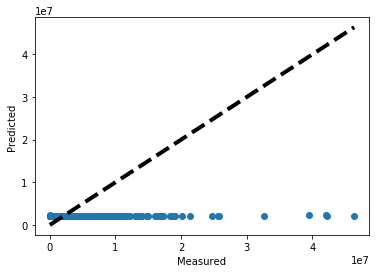

In [66]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_svr)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

COMMENTAIRE:

#### Application du modèle: Lasso

Ce modèle est pratique pour écarter les features non pertinents.

In [67]:
from sklearn.linear_model import Lasso
lasso= Lasso(tol=0.1)

In [68]:
# On crée le modèle à l'aide de pipeline
pipe_lasso= make_pipeline(column_trans,lasso)

In [69]:
# liste des paramètres de l'estimateur:
pipe_lasso.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'lasso', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__onehotencoder', 'columntransformer__standardscaler', 'columntransformer__onehotencoder__categories', 'columntransformer__onehotencoder__drop', 'columntransformer__onehotencoder__dtype', 'columntransformer__onehotencoder__handle_unknown', 'columntransformer__onehotencoder__sparse', 'columntransformer__standardscaler__copy', 'columntransformer__standardscaler__with_mean', 'columntransformer__standardscaler__with_std', 'lasso__alpha', 'lasso__copy_X', 'lasso__fit_intercept', 'lasso__max_iter', 'lasso__normalize', 'lasso__positive', 'lasso__precompute', 'lasso__random_state', 'lasso__selection', 'lasso__tol', 'lasso__warm_start'])

In [70]:
# Cross validation avec: cross_val_score()
cross_val_score(pipe_lasso,X_train,y_train,cv=5).mean()

0.8526284169598444

In [71]:
# Optimisation des hyperparamètres avec: GridSearchCV()
parameters = {'lasso__alpha':[60,70,80]}
#Grille de recherche:
grid_lasso= GridSearchCV(pipe_lasso,parameters, cv=5,scoring='r2')

In [72]:
grid_lasso.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='ignore',
                       

In [73]:
print(grid_lasso.best_score_)
print(grid_lasso.best_params_)

0.853302934578761
{'lasso__alpha': 80}


In [74]:
model_lasso= grid_lasso.best_estimator_

In [75]:
model_lasso.score(X_test,y_test)

0.6684496852983086

In [76]:
pred_lasso= model_lasso.predict(X_test)

In [77]:
# Evaluation des métriques:
compute_scores(y_test, pred_lasso)

RMSE : 3 077 073
MSE : 9 468 376 151 207
MAE : 1 139 650
Median AE : 515 791
R² : 0.668


[3077072.6593967876,
 9468376151207.219,
 1139649.5064042313,
 515791.0639335052,
 0.6684496852983086]

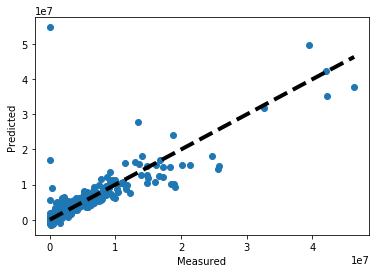

In [78]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_lasso)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Application du modèle: Elastic-Net

In [79]:
from sklearn.linear_model import ElasticNet
elastic= ElasticNet(tol=0.1)

In [80]:
# On crée le modèle à l'aide de pipeline
pipe_elastic= make_pipeline(column_trans,elastic)

In [81]:
# liste des paramètres de l'estimateur:
pipe_elastic.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'elasticnet', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__onehotencoder', 'columntransformer__standardscaler', 'columntransformer__onehotencoder__categories', 'columntransformer__onehotencoder__drop', 'columntransformer__onehotencoder__dtype', 'columntransformer__onehotencoder__handle_unknown', 'columntransformer__onehotencoder__sparse', 'columntransformer__standardscaler__copy', 'columntransformer__standardscaler__with_mean', 'columntransformer__standardscaler__with_std', 'elasticnet__alpha', 'elasticnet__copy_X', 'elasticnet__fit_intercept', 'elasticnet__l1_ratio', 'elasticnet__max_iter', 'elasticnet__normalize', 'elasticnet__positive', 'elasticnet__precompute', 'elasticnet__random_state', 'elasticnet__selection', 'elasticnet__tol', 'elasticne

In [82]:
# Cross validation avec: cross_val_score()
cross_val_score(pipe_elastic,X_train,y_train,cv=5,scoring='r2').mean()

0.8510328008610714

In [83]:
# Optimisation des hyperparamètres avec: GridSearchCV()
parameters = {'elasticnet__l1_ratio':[1e-5,1e-4,1e-3],'elasticnet__alpha':[1e-2,0.1,1]}
#Grille de recherche:
grid_elastic= GridSearchCV(pipe_elastic,parameters, cv=5)

In [84]:
grid_elastic.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='ignore',
                       

In [85]:
print(grid_elastic.best_score_)
print(grid_elastic.best_params_)

0.8719667893175792
{'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 1e-05}


In [86]:
model_elastic= grid_elastic.best_estimator_

In [87]:
model_elastic.score(X_test,y_test)

0.6838566076461292

In [88]:
pred_elastic= model_elastic.predict(X_test)

In [89]:
# Evaluation des métriques:
compute_scores(y_test, pred_elastic)

RMSE : 3 004 727
MSE : 9 028 387 016 367
MAE : 1 053 409
Median AE : 440 467
R² : 0.684


[3004727.444605747,
 9028387016366.982,
 1053409.4556741496,
 440467.26609357167,
 0.6838566076461292]

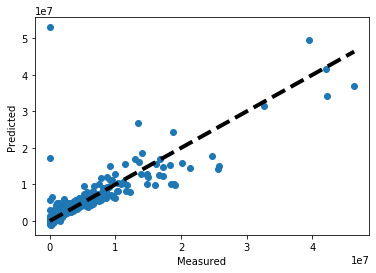

In [90]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_elastic)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Application du modèle: Forests of randomized trees

In [91]:
from sklearn.ensemble import RandomForestRegressor
randomforest= RandomForestRegressor()

In [92]:
# On crée le modèle à l'aide de pipeline
pipe_randomforest= make_pipeline(column_trans, randomforest)

In [93]:
# liste des paramètres de l'estimateur:
pipe_randomforest.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'randomforestregressor', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__onehotencoder', 'columntransformer__standardscaler', 'columntransformer__onehotencoder__categories', 'columntransformer__onehotencoder__drop', 'columntransformer__onehotencoder__dtype', 'columntransformer__onehotencoder__handle_unknown', 'columntransformer__onehotencoder__sparse', 'columntransformer__standardscaler__copy', 'columntransformer__standardscaler__with_mean', 'columntransformer__standardscaler__with_std', 'randomforestregressor__bootstrap', 'randomforestregressor__ccp_alpha', 'randomforestregressor__criterion', 'randomforestregressor__max_depth', 'randomforestregressor__max_features', 'randomforestregressor__max_leaf_nodes', 'randomforestregressor__max_samples', 'ran

In [94]:
# Cross validation avec: cross_val_score()
cross_val_score(pipe_randomforest,X_train,y_train,cv=5,scoring='r2').mean()

0.9119403954270331

In [95]:
parameter= {'randomforestregressor__n_estimators': [100,200,300]}
#Grille de recherche:
grid_randomforest= GridSearchCV(pipe_randomforest, parameter, cv=5)

In [96]:
grid_randomforest.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='ignore',
                       

In [97]:
print(grid_randomforest.best_score_)
print(grid_randomforest.best_params_)

0.91238750151379
{'randomforestregressor__n_estimators': 200}


In [98]:
model_randomforest= grid_randomforest.best_estimator_

In [99]:
model_randomforest.score(X_test,y_test)

0.8464036058099518

In [100]:
pred_randomforest= model_randomforest.predict(X_test)

In [101]:
# Evaluation des métriques:
compute_scores(y_test, pred_randomforest)

RMSE : 2 094 371
MSE : 4 386 388 343 407
MAE : 634 145
Median AE : 168 238
R² : 0.846


[2094370.6318145231,
 4386388343407.1646,
 634144.7238203723,
 168238.0731250001,
 0.8464036058099518]

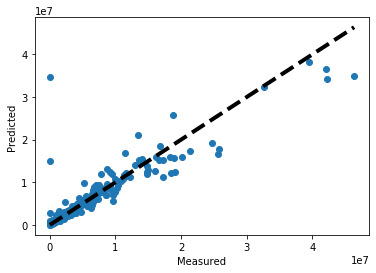

In [102]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_randomforest)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [103]:
print(stop)

NameError: name 'stop' is not defined

##### Application du modèle: Decision Tree Regression with AdaBoost

In [ ]:
adaboost= AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300)

In [ ]:
# On crée le modèle à l'aide de pipeline
pipe_adaboost= make_pipeline(column_trans, adaboost)

In [ ]:
# liste des paramètres de l'estimateur:
pipe_adaboost.get_params().keys()

In [ ]:
# Cross validation avec: cross_val_score()
cross_val_score(pipe_adaboost,X_train,y_train,cv=5,scoring='r2')

In [ ]:
parameter= {'adaboostregressor__loss': ['linear', 'square', 'exponential'], 
           'adaboostregressor__base_estimator__max_depth':[4,6,8]
           , 'adaboostregressor__n_estimators':[300,400,500]}
#Grille de recherche:
grid_adaboost= GridSearchCV(pipe_adaboost, parameter, cv=5)

In [ ]:
grid_adaboost.fit(X_train,y_train)

In [ ]:
print(grid_adaboost.best_score_)
print(grid_adaboost.best_params_)

In [ ]:
model_adaboost= grid_adaboost.best_estimator_

In [ ]:
model_adaboost.score(X_test,y_test)

In [ ]:
pred_adaboost= model_adaboost.predict(X_test)

In [ ]:
r2_score(y_test, pred_adaboost)

In [ ]:
print(stop)

##### Intégration du feature (ENERGYSTARScore):

In [ ]:
# Ajout du feature (ENERGYSTARScore):
col_num= ['NumberofBuildings','NumberofFloors','PropertyGFAParking','BuildingAge','ENERGYSTARScore']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline( steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
categorical_transformer= OneHotEncoder(handle_unknown='ignore')
                                       
                                       
ct = ColumnTransformer([("num", numeric_transformer, col_num),("cat", categorical_transformer, col_categ)])
    

##### Application du modèle Ridge Regression:

In [ ]:
pipe= make_pipeline(ct,ridge)

In [ ]:
cross_val_score(pipe,X_train,y_train,cv=5,scoring='r2')

In [ ]:
# liste des paramètres de l'estimateur:
pipe.get_params().keys()

In [ ]:
# Définition des paramètres:
#le paramètre alpha permet de corriger l'overfitting
parameter= {'ridge__alpha': [5,10,15]}
#Grille de recherche:
grid= GridSearchCV(pipe ,parameter, cv=5,scoring='r2')

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

In [ ]:
model_ridge= grid.best_estimator_

In [ ]:
pred_ridge= model_ridge.predict(X_test)

In [ ]:
# Evaluation des métriques:
compute_scores(y_test, pred_ridge)